In [1]:
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
X, _ = make_blobs(n_samples=1000,
                  centers=2,
                  n_features=2,
                  random_state=42)

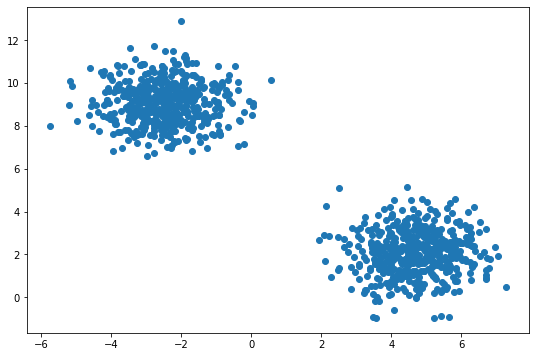

In [3]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [ ]:
class KMeans:

    def __init__(self, k):
        self.k = k

    def euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def calc_dists(self, centroids, x):
        distances = []
        for c in centroids:
            dists = [self.euclidean_dist(c, x_point) for x_point in x]
            distances.append(dists)
        return distances

    def fit(self, x):
        np.random.seed(42)
        self.centroids = np.random.uniform(low=-15, high=15, size=(self.k, x.shape[1]))
#         self.centroids = np.random.rand(self.k, x.shape[1])

        done = False
        prev_centroids = np.zeros((self.k, x.shape[1]))
        while not done:
            labels = self.predict(x)

            point_label = np.hstack((x, np.vstack(labels)))

            for cl in range(self.k):
                points_of_cluster = point_label[point_label[:, 2] == cl]
                centroid = np.mean(points_of_cluster[:, :2], axis=0)
                self.centroids[cl, :] = centroid

            if np.allclose(self.centroids, prev_centroids):
                break
            else:
                prev_centroids = self.centroids

    def predict(self, x):
        assert len(x.shape) == 2
        distances = self.calc_dists(self.centroids, x)
        labels = np.argmin(np.array(distances).T, axis=-1)
        return labels


In [5]:
# Проведите поиск гиперпараметра с помощью Silluhete score

In [6]:
model = KMeans(2)
model.fit(X)

In [7]:
y = model.predict(X)

metrics.silhouette_score(X, y)

0.8252458901491531

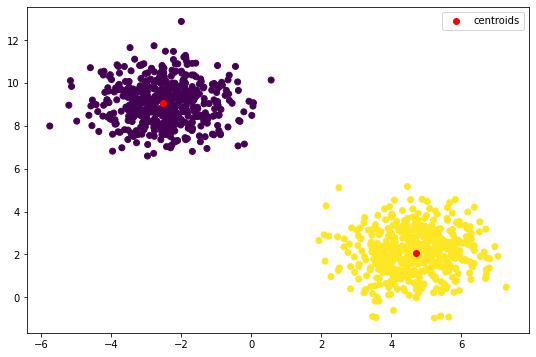

In [8]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.centroids[:,0], model.centroids[:,1], c='red', label='centroids')
plt.legend();

In [9]:
# Испольуя 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# Найдите лучшее k на данных

In [10]:
np.random.seed(42)
X, _ = make_blobs(n_samples=1000,
                  centers=10,
                  n_features=2,
                  cluster_std=np.random.uniform(low=0.5, high=2, size=(10)),
                  random_state=42)

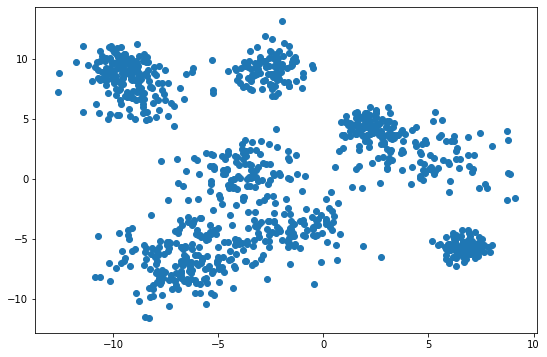

In [11]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [ ]:
model = KMeans(6)
model.fit(X)

In [24]:
y = model.predict(X)

metrics.silhouette_score(X, y)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

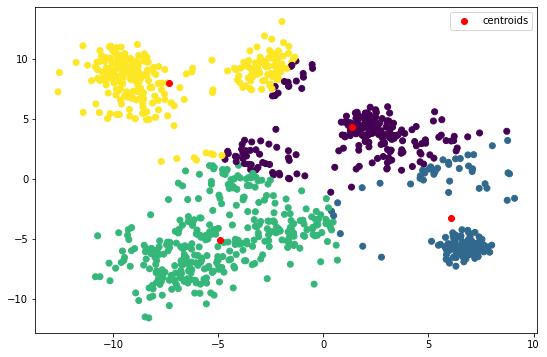

In [21]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.centroids[:,0], model.centroids[:,1], c='red', label='centroids')
plt.legend();